In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as pltt
import os

### Getting the data

In [2]:
print(os.getcwd())
#I like to print out my working directory to first. To use this, the OS library has to be loaded

/Users/motun


In [3]:
%cd /Users/motun/Desktop/Data/Python_Jupyter
#Now I changed the directory to where the data is saved on my computer. Note that if you use a mac,
#an easy way to find the directory is to drag the file into your terminal

/Users/motun/Desktop/Data/Python_Jupyter


In [4]:
telco_data = pd.read_csv('telco-customer-churn.csv')


### Exploring the data

In [5]:
telco_data.head()
#I do this to see the first five rows on the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_data.shape
print(f'Row: {telco_data.shape[0]}')
print(f'Column: {telco_data.shape[1]}')

Row: 7043
Column: 21


In [7]:
telco_data.columns.tolist()
#I want to see the names of the columns in the data to better understand the content of the data.
#columns.tolist() shows the content in a list

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
telco_data.info()
#I notice that this works with or without the print command 
#print(telco_data.info) will give the same result as above
#info gives a quick overview of the data set. number of columns, column names, data type, counts the number of nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#I have seen the number of colums and and rows the data has and a fair idea what is contained in both.
#Next is to check is there are any null values in the data


In [10]:
nulls = telco_data[telco_data.isna().any(axis=1)]
print(nulls)
#isna is wrapped in a square bracket to return a list of the result.
#axis= 0 will drop any column that has nan values, which you might not want most times. 
#axis = 1 will drop only the rows that have nan values in any of the columns.

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [11]:
telco_data.isnull().sum()
#I could also use the isnull funtion to find if there are missing values, but it is not my preference
#This is because it gives a boolean result of True and false and I am unable to see look through the entire dataframe for where True exists
#Same applies to the notnull() function
#Adding the 'sum' function at the end gives a better summary of the data to see how many elements within a column 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
telco_data.nunique()
#This checks the unique number of observations in each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [24]:
col_names = telco_data.columns.tolist()
num_columns =['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID']

In [45]:
cat_col = ([col for col in col_names if col not in num_columns])


In [47]:
for col in cat_col:
    telco_data[col].value_counts()
col

'Churn'

In [55]:
telco_data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

### Visualising the data for better exploration

In [12]:
# 1. What is the proportion of the customer that actually churn in the data

In [13]:
telco_data["Churn"].value_counts()
#This outputs the count of Yes and No in the column "Churn"

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
telco_data["Churn"].value_counts(normalize = True)
#Adding the normalize = True makes each value the proportion of the total. This is simple normalization of the data
#I can immediately see that 26% of the customers churned.

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [15]:
yes = telco_data.loc[telco_data["Churn"] == "Yes"].count()[0]
no = telco_data.loc[telco_data["Churn"] == "No"].count()[0]
explode = (0, 5) #
labels = ["Yes", "No"]

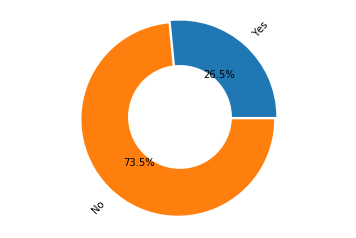

In [16]:
pltt.pie(
        [yes,no], 
        labels = labels, 
        explode = explode, 
        autopct='%1.1f%%',    #- Shows the values as the percetage of total
        radius = 150,
        rotatelabels = 'true'
)
pltt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
innercircle = pltt.Circle((0,0), radius =80,color ='white')
p=pltt.gcf()
p.gca().add_artist(innercircle)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc77710>,
      dtype=object)

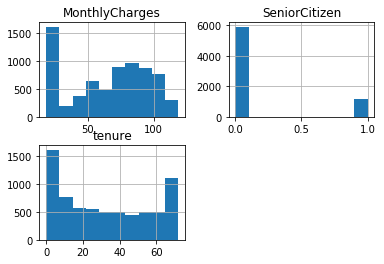

In [17]:
telco_data.hist()    

In [18]:
#To enable the algorithm identify the churn column, I wil convert it to a numberical variable
telco_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [19]:
import plotly.graph_objs as go

In [20]:
#Now I want to keep only numberical values in the data
telco_data_num = telco_data.select_dtypes(exclude = ["bool_", "object_"])
telco_data_num.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


#### Feature Engineering

In [58]:
target = telco_data['Churn']

In [92]:
telco_dummy = pd.get_dummies(telco_data, columns=cat_col)
telco_dummy = telco_dummy.drop('Churn_0', axis = 1)

telco_dummy = telco_dummy.rename(columns={"Churn_1": "churn"})
telco_dummy


,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.5,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
7039,2234-XADUH,72,103.20,7362.9,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
7040,4801-JZAZL,11,29.60,346.45,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,8361-LTMKD,4,74.40,306.6,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1


In [124]:
telco_dummy = telco_dummy.replace(to_replace = ' ', 
                 value ='0')

In [133]:
telco_dummy['TotalCharges'] = pd.to_numeric(telco_dummy['TotalCharges'])

### Building the Model

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
#import xgboost as xgb
#from xgboost import XGBClassifier

In [128]:
y = telco_dummy['churn']
x = telco_dummy[[col for col in telco_dummy.columns if col != 'churn' and col != 'customerID' ]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Size of train dataset: {} rows".format(x_train.shape[0]))
print("Size of test dataset: {} rows".format(x_test.shape[0]))

Size of train dataset: 5634 rows
Size of test dataset: 1409 rows


In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   gender_Female                            7043 non-null   uint8  
 4   gender_Male                              7043 non-null   uint8  
 5   SeniorCitizen_0                          7043 non-null   uint8  
 6   SeniorCitizen_1                          7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

In [138]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
prediction = rfc.predict(x_test)

In [140]:
print("Model Accuray: {:.2f}%".format(100*rfc.score(x_test, y_test)))

Model Accuray: 79.06%


### Feature Importance

In [141]:
rfc.feature_importances_

array([0.1399528 , 0.13456715, 0.15732251, 0.01770868, 0.01775881,
       0.01344176, 0.01296815, 0.01521584, 0.01500316, 0.01159719,
       0.01150948, 0.00309119, 0.00282382, 0.01318075, 0.00347818,
       0.01354474, 0.01073818, 0.02760104, 0.00129618, 0.02607851,
       0.00293753, 0.0118378 , 0.01749752, 0.00277932, 0.01195938,
       0.01373777, 0.00342713, 0.01191759, 0.02486946, 0.00336083,
       0.01132   , 0.01158949, 0.00231421, 0.01136223, 0.01156786,
       0.00186448, 0.01218635, 0.05461334, 0.01086435, 0.02033983,
       0.01550299, 0.01442256, 0.01216711, 0.01205822, 0.0332049 ,
       0.01141967])

Feature ranking:
1. TotalCharges- (0.157323)
2. tenure- (0.139953)
3. MonthlyCharges- (0.134567)
4. Contract_Month-to-month- (0.054613)
5. PaymentMethod_Electronic check- (0.033205)
6. InternetService_Fiber optic- (0.027601)
7. OnlineSecurity_No- (0.026079)
8. TechSupport_No- (0.024869)
9. Contract_Two year- (0.020340)
10. gender_Male- (0.017759)
11. gender_Female- (0.017709)
12. OnlineBackup_No- (0.017498)
13. PaperlessBilling_No- (0.015503)
14. Partner_No- (0.015216)
15. Partner_Yes- (0.015003)
16. PaperlessBilling_Yes- (0.014423)
17. DeviceProtection_No- (0.013738)
18. MultipleLines_Yes- (0.013545)
19. SeniorCitizen_0- (0.013442)
20. MultipleLines_No- (0.013181)
21. SeniorCitizen_1- (0.012968)
22. StreamingMovies_Yes- (0.012186)
23. PaymentMethod_Bank transfer (automatic)- (0.012167)
24. PaymentMethod_Credit card (automatic)- (0.012058)
25. OnlineBackup_Yes- (0.011959)
26. DeviceProtection_Yes- (0.011918)
27. OnlineSecurity_Yes- (0.011838)
28. Dependents_No- (0.011597)
29. Streaming

AttributeError: 'NoneType' object has no attribute 'update'

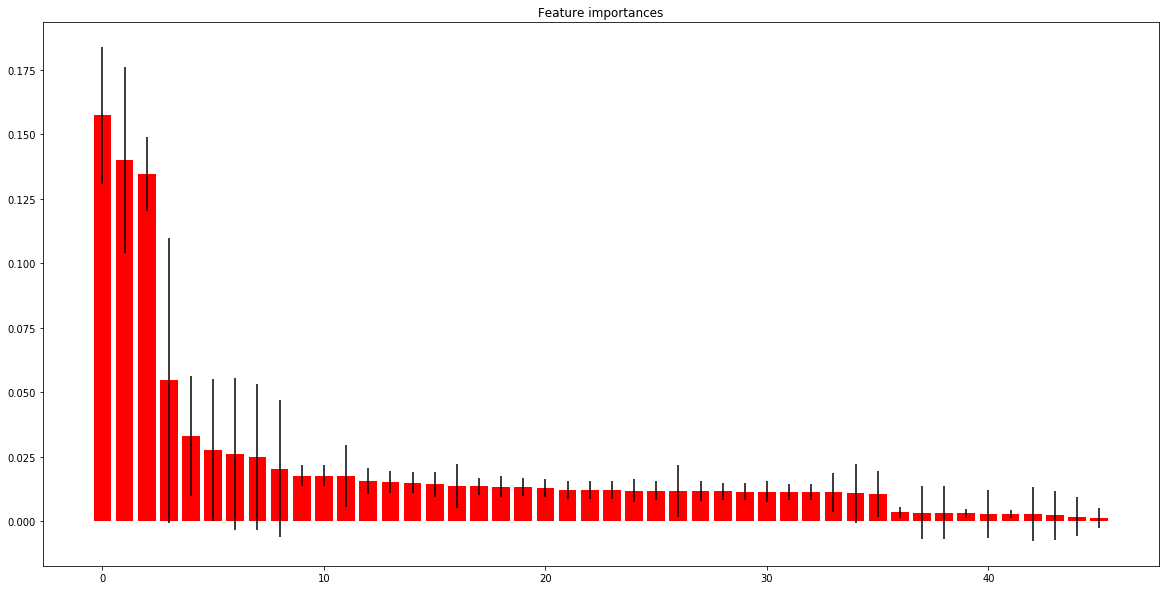

In [185]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]




# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. %s- (%f)" % (f + 1, x.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
pltt.figure(figsize =(20,10))
pltt.title("Feature importances")
pltt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
pltt.xticks(x.columns[indices[f]])
pltt.xlim([-1, 48])
pltt.show()

array([ 2,  0,  1, 37, 44, 17, 19, 28, 39,  4,  3, 22, 40,  7,  8, 41, 25,
       15,  5, 13,  6, 36, 42, 43, 24, 27, 21,  9, 31, 34, 10, 45, 33, 30,
       38, 16, 14, 26, 29, 11, 20, 12, 23, 32, 35, 18])